In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


# Неделя 6

* Наивный байесовский классификатор
* Несбалансированные выборки

## Наивный байесовский классификатор

#### Решаем задачу классивикации:

$X, y = \{ (x_1, y_1), \dots, (x_n, y_n)\}, \  x_i \in R^m, y_i \in \{0, \dots, k-1\}$




$a(x) = \underset{j}{argmax} \ \  p(y = j|x)$



$p(y|x) = \frac{p(x, y)}{p(x)} = \frac{p(y)p(x|y)}{p(x)} \propto p(y) p(x|y) = p(y)p(x_1, \dots, x_m| y)$

### Наивный байесовский классификатор

Делает предположение об условной независимости признаков относительно $y$:

$p(x_1, \dots, x_m|y) = \prod\limits_{i=1}^m p(x_i|y)$

Как обучать?

$p(y|x) \propto p(y)\prod\limits_{i=1}^m p(x_i|y)$



а) Логарифмируем:

$ p(y|x_1, \dots, x_n) \propto p(y) p(x_1, \dots, x_n|y) \sim log p(y) + \sum\limits_{i=1}^m log \ p(x_i|y)$

б) Восстанавливаем вероятности по обучающей выборке
1. $p(y_k)$ -- обычно частота встречаемости $y_k$ в выборке, т.е. $p(y_k) = \frac{\sum I_{y=y_k}}{n}$
2. $p(x_i|y), \  i \in \{1, \dots, m\}$ -- оцениваем при помощи ММП 

## Рассмотрим виды ММП в зависимости от типа признака

### Категориальный признак:
    
 Метод максимального правдоподобия:
 
 $\hat{p}(x_i = v| y) = \frac{n_i^v}{\sum\limits_{s\in T_i} n_i^s}$
 
$n_i^v$ – число раз, которое признак $i$ был равен $v$ на объектах класса $y$, $T_i$ – набор
значений признака $x_i$

Малое количество статистики может привести к нулевым вероятностям

Для борьбы с этим можно использовать различные сглаживания 

Например сглаживание Лапласа:

 $\hat{p}(x_i = v| y) = \frac{n_i^v + \alpha}{\sum\limits_{s\in T_i} n_i^s + \alpha |T_i|}$

Пусть признак принимает k значений, т.е. мы хотим найти оценку $(p_1, \dots, p_k)$. 

$p(x_i) = p_1 ^ {[x_i = 1]} \cdot \dots \cdot p_k ^{[x_i = k]}$

$p(\vec X) = p_1 ^{n_1} \cdot \dots \cdot p_k^{n_k}$

$log \ p(\vec X) = n_1 log(p_1) + \dots + n_k log(p_k) \longrightarrow \max \limits_{p_1, \dots, p_k}$



$log \ p(\vec X) = n_1log(p_1) + \dots + n_k log(1 - \sum\limits_{i=1}^{k-1}p_i)$

$\frac{\partial LogLik}{\partial p_1} = \frac{n_1}{p_1} - \frac{n_k}{p_k} = 0 \Longrightarrow n_1p_k = p_1n_k$  

$n_1p_k = p_1n_k$  

Очевидно, что $\forall i$ справедливо $n_1p_i = p_1n_i$, возьмем суммы:

$\sum_i n_1p_i = \sum_i p_1n_i$

$n_1 \sum_i p_i = p_1 \sum n_i \Longrightarrow n_1 = p_1\sum_i n_i$

Получаем 

$p_1 = \frac{n_1}{\sum_i n_i}$

Для остальных индексов аналогично

### Оценка для признаков - счетчиков

* ММП:

$\hat{p}(x_i|y) = \frac{c_{iy}}{\sum_{j=1}^m c_{jy}}$

$c_{iy}$ – число раз, которое признак $i$ был встречен на объектах класса $y$

* Сглаживание Лапласа:

$\hat{p}(x_i|y) = \frac{c_{iy} + \alpha}{\sum_{j=1}^m c_{jy} + \alpha \cdot m}$

### Оценка для непрерывных признаков

1. Распределение $p(x_i |y)$ оценивается через какое-то стандартное распределение
(например, нормальное), а ММП оценивает параметры этого распределения
2. Kernel density estimation (sklearn.neighbors.KernelDensity)

#### KDE:

$\hat{p}(x) = \frac1{nh}\sum\limits_{i=1}^n K(\frac{x - x_i}{h})$

$h - $ ширина окна

$K-$ ядро, например $K(u) = \frac1{\sqrt{2\pi}}e^{-\frac{u^2}{2}}$
<img src="https://i.ibb.co/BVLH1R5/2020-04-14-00-22-55.png" width="400">

![title](https://i.ibb.co/QHt5Tk4/2020-04-11-21-46-21.png)

Рассмотрим распределение $\eta = 0.3 \cdot N(0, 1) + 0.7 \cdot N(5, 1) $

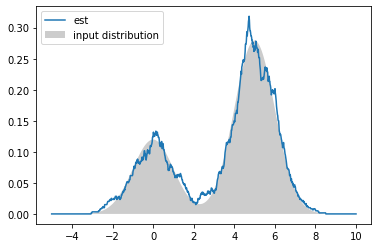

In [2]:
from sklearn.neighbors import KernelDensity
from scipy.stats import norm

n = 1000
X = np.concatenate((np.random.normal(0, 1, int(0.3 * n)), np.random.normal(5, 1, int(0.7 * n))))[:, None]
xs = np.linspace(-5, 10, n)[:, None]
true_dens = 0.3 * norm(0, 1).pdf(xs[:, 0]) + 0.7 * norm(5, 1).pdf(xs[:, 0])
plt.fill(xs[:, 0], true_dens, fc='black', alpha=0.2, label='input distribution')
kde = KernelDensity(kernel='tophat', bandwidth=0.3).fit(X)
log_dens = kde.score_samples(xs)
plt.plot(xs[:, 0], np.exp(log_dens), label='est')
plt.legend();

### Наивный байесовский классификатор в sklearn:

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(f"Number of mislabeled points out of a total {X_test.shape[0]} points : {(y_test != y_pred).sum()}")

Number of mislabeled points out of a total 75 points : 4


### Несбалансированные выборки

- Объектов одного класса сильно больше, чем другого
    - антифрод
    - медицинская диагностика
    
- Из-за сильной несбалансированности многие классификаторы начинают плохо работать, некоторым метрикам тоже может стать не очень хорошо

- Попробуем ответить на вопросы
    - Какую метрику выбрать?
    - Как бить на трейн и валидацию?
    - Как можно сделать выборку менее перекошенной?

### Какую метрику выбрать

* Забываем про accuracy:

Если отношение объектов классов 999: 1, а модель всегда выдает мажоритарный класс, то accurcy будет 0.999, но модель по сути бесполезна

* Хорошие метрики: 

$recall = \frac{tp}{tp + fn}$

$precision = \frac{tp}{tp + fp}$

$ F_\beta = (1  + \beta ^2) \cdot \frac{precision \cdot recall}{\beta ^ 2 \cdot precision + recall}$

* Не забываем тюнить порог бинаризации!

### Как бить на трейн и валидацию?

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=10000, weights=[0.999, 0.001], flip_y=False)
y.mean()

0.001

In [5]:
*_, y_test = train_test_split(X, y, test_size=0.1)
y_test.mean()

0.0

In [6]:
*_, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
y_test.mean()

0.001

#### Еще:

- sklearn.model_selection.StratifiedKFold
- https://github.com/trent-b/iterative-stratification

### Как делать выборку менее перекошенной?

- Удалить объекты мажоритарного класса (undersampling)

- Добавить объектов миноритарного класса (oversampling)

### Smote

<img src="https://i.ibb.co/195PYDy/2020-04-12-15-29-20.png" width="600">
Пусть $X_1$ -- объект миноритарного класса, при помощи kNN найдем его ближайших соседей из миноритарного класса $X_{11}, \dots,  X_{1m}$

Будем добавлять объекты вида $\alpha \cdot X_1 + (1 - \alpha) \cdot X_{1, k}, \ \alpha = (\alpha_1, \dots, \alpha_m)  \ \alpha_i \in (0, 1), \ k\in\{1, \dots, m\}$ 

In [7]:
from imblearn.over_sampling import SMOTE

X, y = make_classification(n_samples=10000, weights=[0.999, 0.001], flip_y=False)
y.mean()

0.001

In [8]:
sampler = SMOTE(random_state=42, k_neighbors=3)
X_new, y_new = sampler.fit_resample(X, y)
y_new.mean()

0.5

### Focal Loss

<img src="https://i.postimg.cc/d34Rqwgj/2021-03-28-16-58-09.png" width=400>
<img src="https://i.postimg.cc/1RjfZ8jY/2021-03-28-17-00-43.png" width=400>
<img src="https://i.postimg.cc/BQFQ9MDX/2021-03-28-17-00-48.png" width=400>
<img src="https://i.postimg.cc/9MSVs7Qd/2021-03-28-17-01-13.png" width=400>
<img src="https://i.postimg.cc/xCjc9MQB/2021-03-28-17-01-19.png" width=400>

https://arxiv.org/pdf/1708.02002.pdf